In [2]:
install.packages("quadprog")

package 'quadprog' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\engle\AppData\Local\Temp\RtmpKO7QGj\downloaded_packages


In [3]:
install.packages("PerformanceAnalytics")

package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\engle\AppData\Local\Temp\RtmpKO7QGj\downloaded_packages


In [4]:
install.packages("IntroCompFinR", repos="http://R-Forge.R-project.org")

installing the source package 'IntroCompFinR'



In [5]:
library(IntroCompFinR)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


In [6]:
# Inserindo os retornos 2015-2019

ativos <- c("ITUB4", "ABEV3", "NATU3", "PETR4")

itub_ret <- c(-0.13, 0.49, 0.30, 0.32, 0.0235)
abev_ret <- c(0.1207, -0.496, 0.3310, -0.2559, 0.2172)
natu_ret <- c(-0.2184, -0.004, 0.4511, 0.3749, 0.4771)
petr_ret <- c(-0.33,1.21,0.08,0.46,0.07)


In [7]:
# Criando a matriz de retornos

retornos <- cbind(itub_ret, abev_ret, natu_ret, petr_ret)

retornos

itub_ret,abev_ret,natu_ret,petr_ret
-0.1300,0.1207,-0.2184,-0.33
0.4900,-0.4960,-0.0040,1.21
0.3000,0.3310,0.4511,0.08
0.3200,-0.2559,0.3749,0.46
0.0235,0.2172,0.4771,0.07


In [8]:
# Construindo a matriz de retorno medio

retorno_medio <- rbind(mean(retornos[,1]), mean(retornos[,2]), mean(retornos[,3]), mean(retornos[,4]))

rownames(retorno_medio) <- ativos

retorno_medio

ITUB4,0.20070
ABEV3,-0.01660
NATU3,0.21614
PETR4,0.29800


In [9]:
matriz_cov <- cov(retornos)

rownames(matriz_cov) <- ativos
colnames(matriz_cov) <- ativos

matriz_cov

,ITUB4,ABEV3,NATU3,PETR4
ITUB4,0.06213745,-0.05488917,0.01901134,0.1274005
ABEV3,-0.05488917,0.12035709,0.03764151,-0.1728217
NATU3,0.01901134,0.03764151,0.09644942,-0.0032194
PETR4,0.12740050,-0.17282175,-0.00321940,0.3379700


In [10]:
tx_livre_risco <- 0.06

In [11]:
short_selling <- FALSE

In [12]:
# Vamos calcular a nossa carteira mais eficiente - chamado de Tangency Portfolio

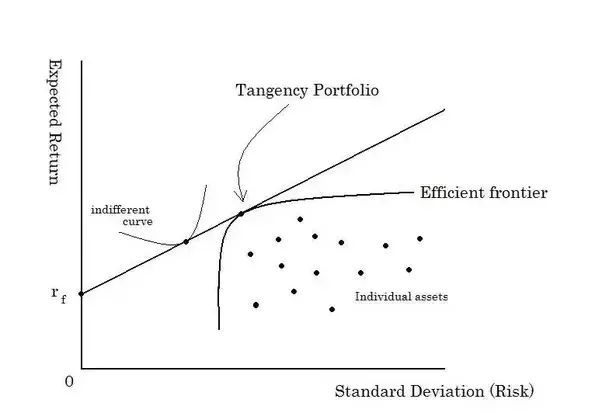

In [18]:
# Carteira Eficience
carteira_eficiente <- tangency.portfolio(retorno_medio, matriz_cov, tx_livre_risco, shorts = short_selling)

carteira_eficiente

Call:
tangency.portfolio(er = retorno_medio, cov.mat = matriz_cov, 
    risk.free = tx_livre_risco, shorts = short_selling)

Portfolio expected return:     0.2081941 
Portfolio standard deviation:  0.2185496 
Portfolio weights:
[1] 0.5798 0.0000 0.4079 0.0123

In [19]:
ativos

[1] "ITUB4" "ABEV3" "NATU3" "PETR4"

In [20]:
# Calculo da carteira com a menor risco possível
carteira_min_risco <- globalMin.portfolio(retorno_medio, matriz_cov, shorts = short_selling)

carteira_min_risco

Call:
globalMin.portfolio(er = retorno_medio, cov.mat = matriz_cov, 
    shorts = short_selling)

Portfolio expected return:     0.1033685 
Portfolio standard deviation:  0.1145999 
Portfolio weights:
[1] 0.1679 0.5667 0.0000 0.2654

In [21]:
# compute portfolio frontier
fronteira_eficiente <- efficient.frontier(retorno_medio, matriz_cov, nport = 40, shorts = short_selling)

fronteira_eficiente

attributes(fronteira_eficiente)

Call:
efficient.frontier(er = retorno_medio, cov.mat = matriz_cov, 
    nport = 40, shorts = short_selling)

Frontier portfolios' expected returns and standard deviations
   port 1 port 2 port 3 port 4 port 5 port 6 port 7 port 8 port 9 port 10
ER 0.1034 0.1084 0.1133 0.1183 0.1233 0.1283 0.1333 0.1383 0.1433  0.1483
SD 0.1146 0.1151 0.1166 0.1191 0.1226 0.1265 0.1308 0.1354 0.1403  0.1454
   port 11 port 12 port 13 port 14 port 15 port 16 port 17 port 18 port 19
ER  0.1533  0.1583  0.1633  0.1682  0.1732  0.1782  0.1832  0.1882  0.1932
SD  0.1507  0.1562  0.1618  0.1676  0.1735  0.1796  0.1858  0.1921  0.1985
   port 20 port 21 port 22 port 23 port 24 port 25 port 26 port 27 port 28
ER  0.1982  0.2032  0.2082  0.2132  0.2182  0.2231  0.2281  0.2331  0.2381
SD  0.2050  0.2117  0.2185  0.2261  0.2342  0.2428  0.2517  0.2609  0.2705
   port 29 port 30 port 31 port 32 port 33 port 34 port 35 port 36 port 37
ER  0.2431  0.2481  0.2531  0.2581  0.2631  0.2681  0.2730  0.2780  0.2830
SD  0.2

$names
[1] "call"    "er"      "sd"      "weights"

$class
[1] "Markowitz"

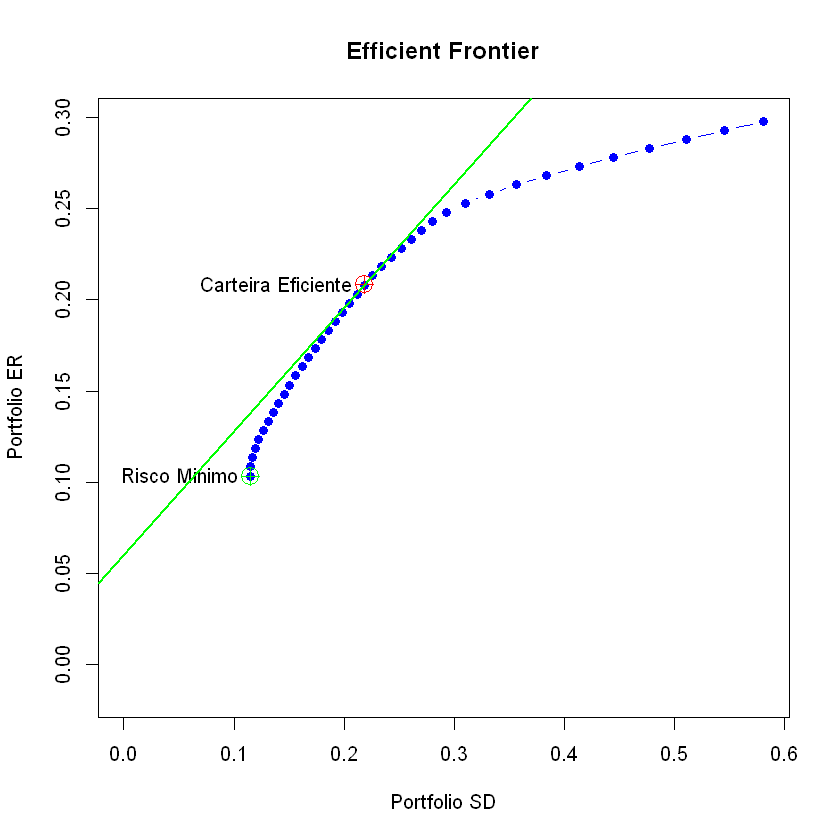

In [24]:
# Visualizaçao da saida

plot(fronteira_eficiente, plot.assets=TRUE, col="blue", pch=16)

points(carteira_min_risco$sd, carteira_min_risco$er, col="green", pch=10, cex=2)
points(carteira_eficiente$sd, carteira_eficiente$er, col="red", pch=10, cex=2)

text(carteira_min_risco$sd, carteira_min_risco$er, labels="Risco Minimo", pos=2)
text(carteira_eficiente$sd, carteira_eficiente$er, labels="Carteira Eficiente", pos=2)

tangente <- (carteira_eficiente$er - tx_livre_risco)/carteira_eficiente$sd
abline(a = tx_livre_risco, b=tangente, col="green", lwd=2)